# Naive Bayes Theorem

* P(Queen | Diamond) = 1 / 13
* THe above is the conditional Porbability.
* Conditional Probability = P (A |B) {Prob of Event A, known that event B has occured}.

* Bayes Theorem = P(A|B) = P(B|A) * P(A) / P(B)
* P(A) = prior
* P(B) = Evidence
* P(B |A) = Likelihood
* P(A |B) = POsterior

## Naive Bayes Classifiers
* uses principles of probability to perform classification
* It seeks to model the distribution of inputs of a given class or category.
* Generally used for text classification.
* Operates by returning the class, which has the maximum probability out of a group of classes.

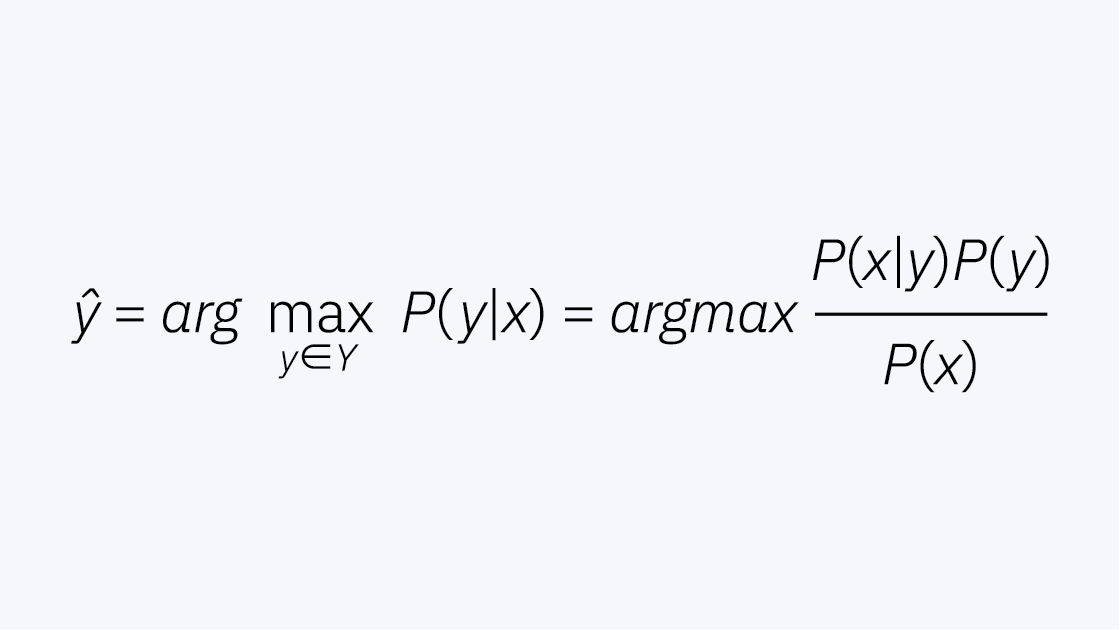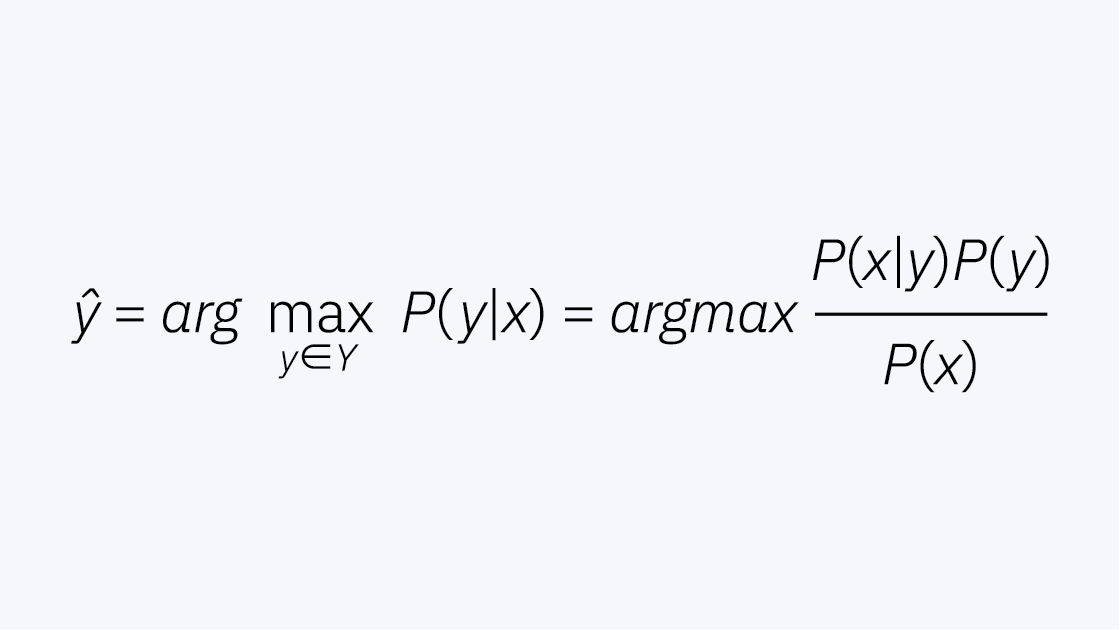

* We eliminate the denominator as each class is referring to the same piece of text.
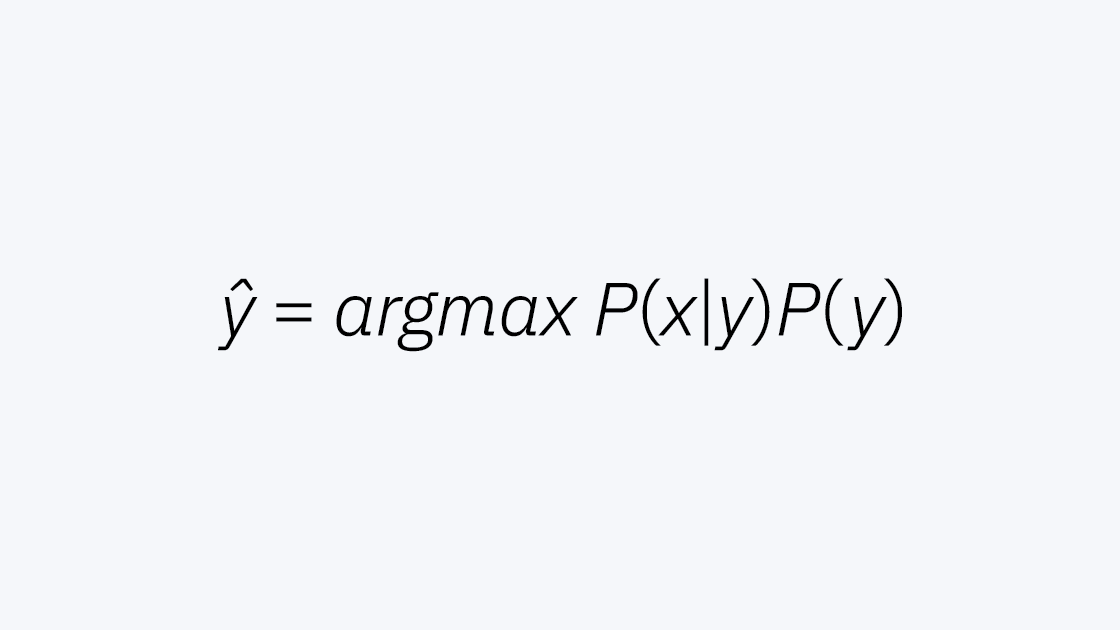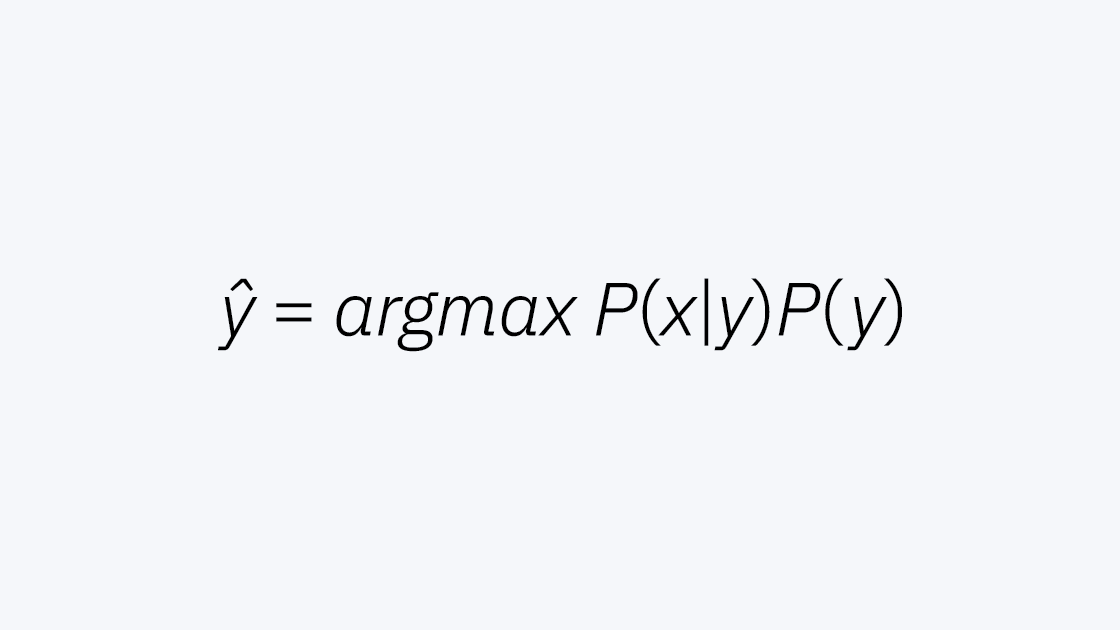

* The final equation is:
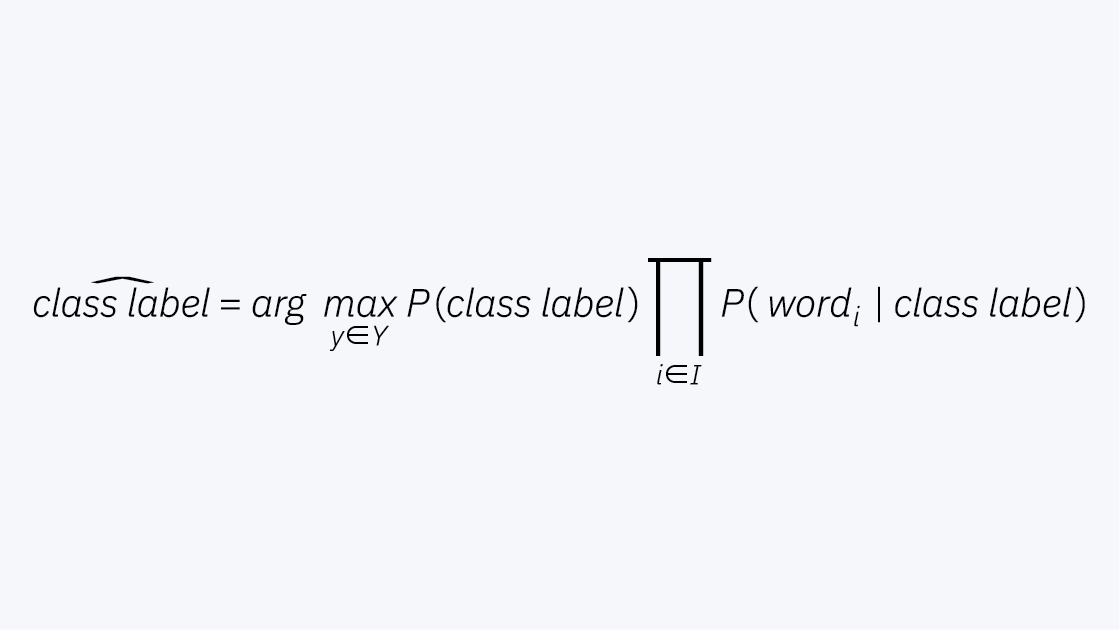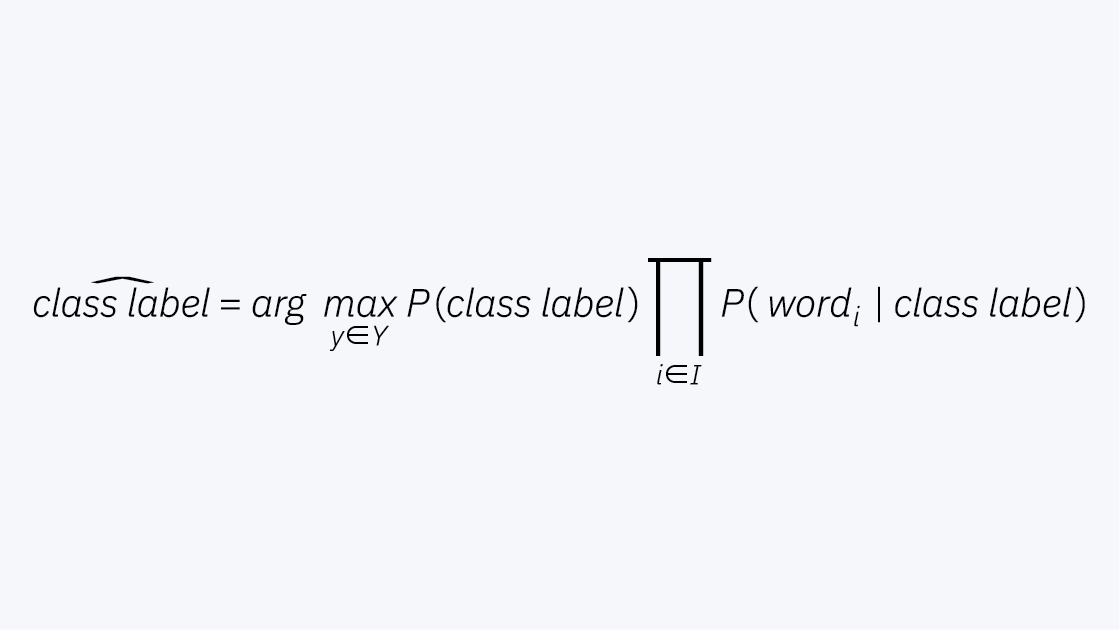
can also be represented in the log space as NB is commonly used in this form.
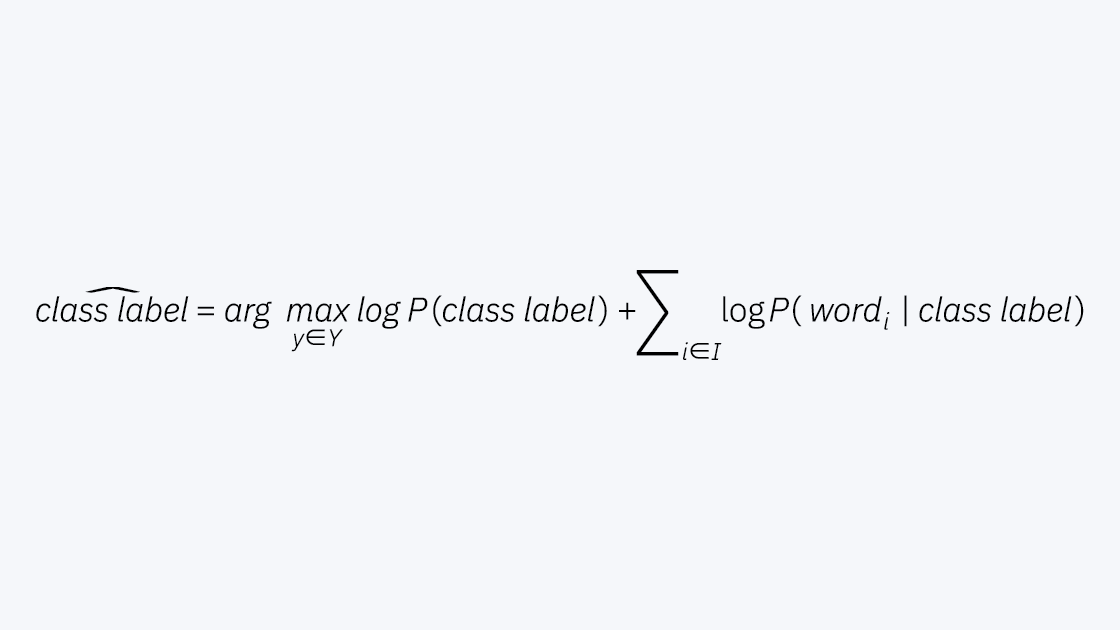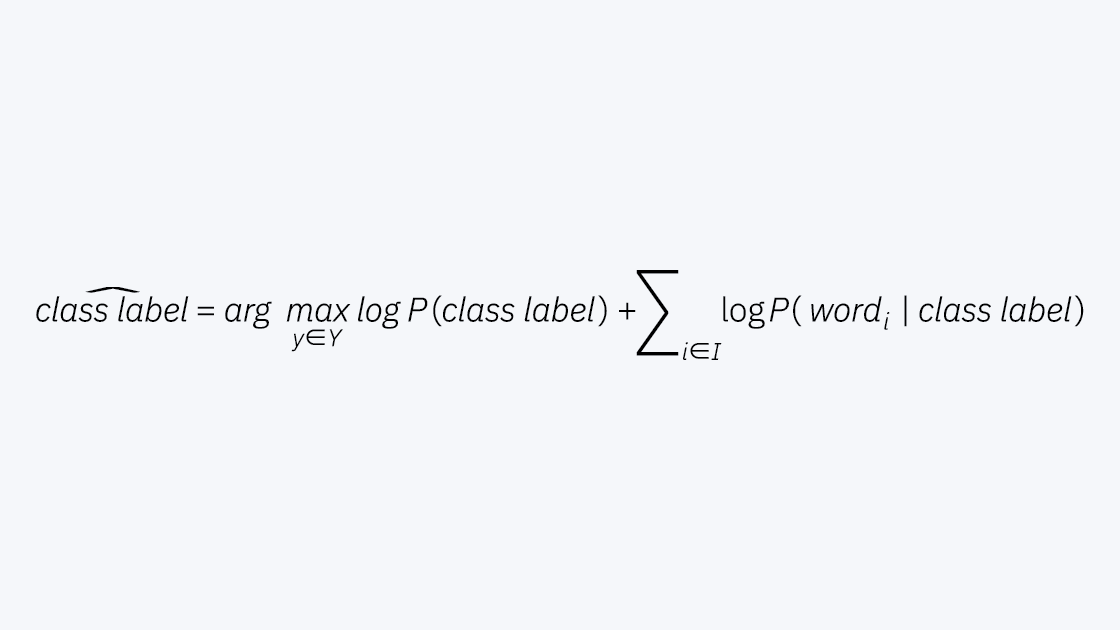

* We evaluate the results using Confusion Matrix; where the rows represent the actual values and the columns represent the predicted values.

* Type of Naive Bayes Classifiers:
  1. Gaussian naive Bayes: applied on normal distribution type of data for finding the mean and standard deviation of each class.
  2. Multinomial Naive bayes: Assumes that the features are from multinomial distributions. Useful when the data is discrete; typically used for NLP like spam classification.
  3. Bernoulli NB: Used for Boolean values.

### Advantages 
* Less complex: easier to estimate the parameters; simpler classifier
* Scales well: fast and efficient classifier when conditional Independence holds.
* Can handle high-dimensional data

### Disadvantages
* Subject to Zero frequency: if any categorical variable doesn't exist in the training, then the prob becomes zero, making the posterior of the related category zero. To solve this we use laplace smoothing.
* Unrealistic core assumptions: Conditional Independence doesn't hold every time leading to incorrect classifications

Applications: Spam filtering, Document Classification, Sentiment Analysis, Mental state predictions

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df.drop(["sibsp", 'parch', 'embarked', 'deck', 'embark_town'], axis = 1, inplace = True)

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'class', 'who',
       'adult_male', 'alive', 'alone'],
      dtype='object')

In [9]:
target = df.survived
inputs = df.drop('survived', axis = 1)

In [10]:
df.head()

,survived,pclass,sex,age,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,8.0500,Third,man,True,no,True


In [11]:
df['sex'] = df['sex'].astype('category').cat.codes

In [12]:
df.head()

,survived,pclass,sex,age,fare,class,who,adult_male,alive,alone
0,0,3,1,22.0,7.2500,Third,man,True,no,False
1,1,1,0,38.0,71.2833,First,woman,False,yes,False
2,1,3,0,26.0,7.9250,Third,woman,False,yes,True
3,1,1,0,35.0,53.1000,First,woman,False,yes,False
4,0,3,1,35.0,8.0500,Third,man,True,no,True


In [13]:
df.dtypes

survived         int64
pclass           int64
sex               int8
age            float64
fare           float64
class         category
who             object
adult_male        bool
alive           object
alone             bool
dtype: object

In [14]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
fare            0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [15]:
# finding if the pclass and class have nay entries that are different from eachother
first = np.argwhere((df['pclass'].to_numpy()==1) & (df['class'].to_numpy() != 'First')).shape[0]
second = np.argwhere((df['pclass'].to_numpy()==2) & (df['class'].to_numpy() != 'Second')).shape[0]
third = np.argwhere((df['pclass'].to_numpy()==3) & (df['class'].to_numpy() != 'Third')).shape[0]

In [16]:
print(first, second, third)

0 0 0


In [17]:
df.drop('class', axis = 1)

,survived,pclass,sex,age,fare,who,adult_male,alive,alone
0,0,3,1,22.0,7.2500,man,True,no,False
1,1,1,0,38.0,71.2833,woman,False,yes,False
2,1,3,0,26.0,7.9250,woman,False,yes,True
3,1,1,0,35.0,53.1000,woman,False,yes,False
4,0,3,1,35.0,8.0500,man,True,no,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,man,True,no,True
887,1,1,0,19.0,30.0000,woman,False,yes,True
888,0,3,0,NaN,23.4500,woman,False,no,False
889,1,1,1,26.0,30.0000,man,True,yes,True


In [18]:
#checking if alive ans survived convey the same information
survived = np.argwhere((df['survived'].to_numpy()==1) & (df['alive'].to_numpy() != 'yes')).shape[0]
dead = np.argwhere((df['survived'].to_numpy()==0) & (df['alive'].to_numpy() != 'no')).shape[0]

print(survived)
print(dead)

0
0


In [19]:
df.drop('alive', axis = 1)

,survived,pclass,sex,age,fare,class,who,adult_male,alone
0,0,3,1,22.0,7.2500,Third,man,True,False
1,1,1,0,38.0,71.2833,First,woman,False,False
2,1,3,0,26.0,7.9250,Third,woman,False,True
3,1,1,0,35.0,53.1000,First,woman,False,False
4,0,3,1,35.0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,Second,man,True,True
887,1,1,0,19.0,30.0000,First,woman,False,True
888,0,3,0,NaN,23.4500,Third,woman,False,False
889,1,1,1,26.0,30.0000,First,man,True,True


In [20]:
# checking missing values for age of a child to fill them appropriately
df['age'][(df['age'].isnull()) & (df['who'] == 'child')]

Series([], Name: age, dtype: float64)

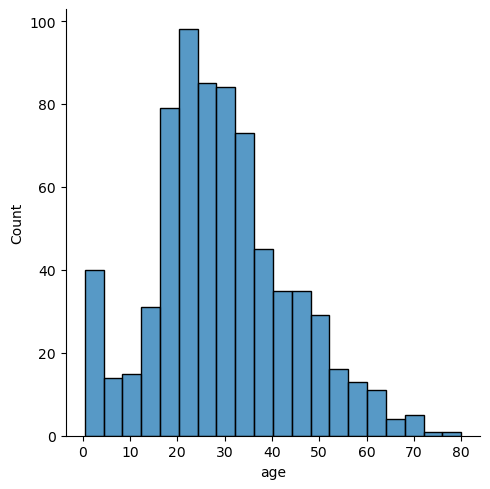

In [21]:
sns.displot(df['age'])

In [22]:
# find the highest fare
df['fare'].max()

512.3292

In [23]:
#print all survivors details
survivors = df[df['survived'] == 1]
survivors

,survived,pclass,sex,age,fare,class,who,adult_male,alive,alone
1,1,1,0,38.0,71.2833,First,woman,False,yes,False
2,1,3,0,26.0,7.9250,Third,woman,False,yes,True
3,1,1,0,35.0,53.1000,First,woman,False,yes,False
8,1,3,0,27.0,11.1333,Third,woman,False,yes,False
9,1,2,0,14.0,30.0708,Second,child,False,yes,False
...,...,...,...,...,...,...,...,...,...,...
875,1,3,0,15.0,7.2250,Third,child,False,yes,True
879,1,1,0,56.0,83.1583,First,woman,False,yes,False
880,1,2,0,25.0,26.0000,Second,woman,False,yes,False
887,1,1,0,19.0,30.0000,First,woman,False,yes,True


In [41]:
string_columns = df.select_dtypes(include = ['object', 'bool', 'category']).columns
string_columns

Index(['class'], dtype='object')

In [43]:
for feature in string_columns:
    df[feature] = df[feature].astype('category').cat.codes

In [45]:
#count total passengers per class
df['class'].value_counts()

class
2    491
0    216
1    184
Name: count, dtype: int64

In [47]:
#finding the maximum fare based on the class
df.groupby('class')['fare'].max()

class
0    512.3292
1     73.5000
2     69.5500
Name: fare, dtype: float64

In [49]:
# finding the average age of the passengers by class
df.groupby('class')['age'].mean()

class
0    37.048118
1    29.866958
2    26.403259
Name: age, dtype: float64

In [51]:
df['age'] = df['age'].fillna(df['age'].mean())

## Naive Bayes implementation

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)

In [58]:
x_test.shape

(179, 10)

In [60]:
x_train

,survived,pclass,sex,age,fare,class,who,adult_male,alive,alone
331,0,1,1,45.500000,28.5000,0,1,1,0,1
733,0,2,1,23.000000,13.0000,1,1,1,0,1
382,0,3,1,32.000000,7.9250,2,1,1,0,1
704,0,3,1,26.000000,7.8542,2,1,1,0,0
813,0,3,0,6.000000,31.2750,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
106,1,3,0,21.000000,7.6500,2,2,0,1,1
270,0,1,1,29.699118,31.0000,0,1,1,0,1
860,0,3,1,41.000000,14.1083,2,1,1,0,0
435,1,1,0,14.000000,120.0000,0,0,0,1,0


In [62]:
y_test.shape

(179,)

In [64]:
print(x_train.dtypes)

survived        int64
pclass          int64
sex              int8
age           float64
fare          float64
class            int8
who              int8
adult_male       int8
alive            int8
alone            int8
dtype: object


In [66]:
90from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # parameters for the GaussianNB are priors = prior probabilities of the classes 
#var_smoothing = portion of the largest variances of all features that is added to variances for calculation stability

In [68]:
model.fit(x_train, y_train)

GaussianNB()

In [70]:
model.score(x_test, y_test)

1.0

In [72]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: survived, dtype: int64

In [74]:
x_test[:10]

,survived,pclass,sex,age,fare,class,who,adult_male,alive,alone
709,1,3,1,29.699118,15.2458,2,1,1,1,0
439,0,2,1,31.000000,10.5000,1,1,1,0,1
840,0,3,1,20.000000,7.9250,2,1,1,0,1
720,1,2,0,6.000000,33.0000,1,0,0,1,0
39,1,3,0,14.000000,11.2417,2,0,0,1,0
290,1,1,0,26.000000,78.8500,0,2,0,1,1
300,1,3,0,29.699118,7.7500,2,2,0,1,1
333,0,3,1,16.000000,18.0000,2,1,1,0,0
208,1,3,0,16.000000,7.7500,2,2,0,1,1
136,1,1,0,19.000000,26.2833,0,2,0,1,0


In [76]:
model.predict(x_test[:10]) #preidcting specific data with the loaded model)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [78]:
model.predict_proba(x_test[:10])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

#### What is predict_proba() in Machine Learning?
The .predict_proba() method in Scikit-Learn classifiers returns the probabilities of each class label for a given input instance. This is particularly useful for probabilistic models like Naïve Bayes, Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks.

Instead of just predicting the most likely class (predict()), predict_proba() gives you the confidence level for each class, allowing better decision-making.

# Decision Tree

# Logistic Regression